In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import FunctionTransformer

In [4]:
from sklearn.compose import ColumnTransformer

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder

In [6]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_set/insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#EDA

**AGE**

<Axes: xlabel='age'>

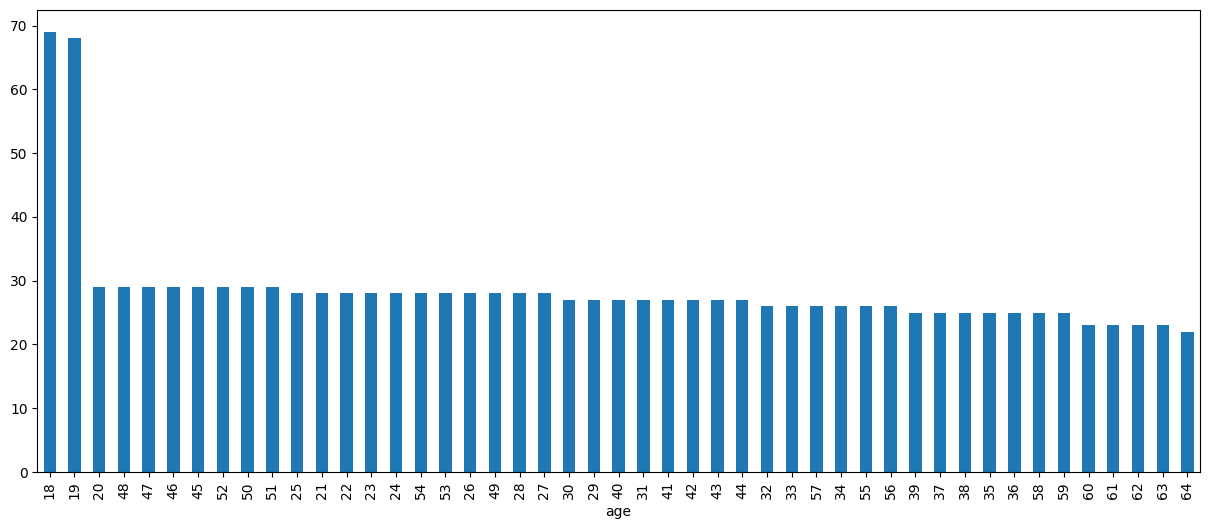

In [9]:
plt.figure(figsize=(15, 6))
df.value_counts('age').plot(kind='bar')

0.05567251565299186


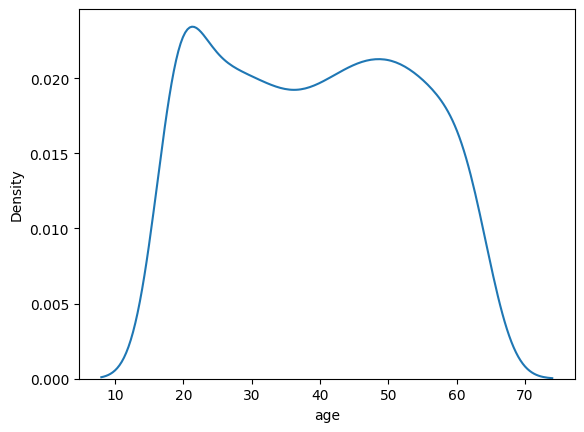

In [10]:
sns.kdeplot(df['age'])
print(df['age'].skew())

<Axes: ylabel='age'>

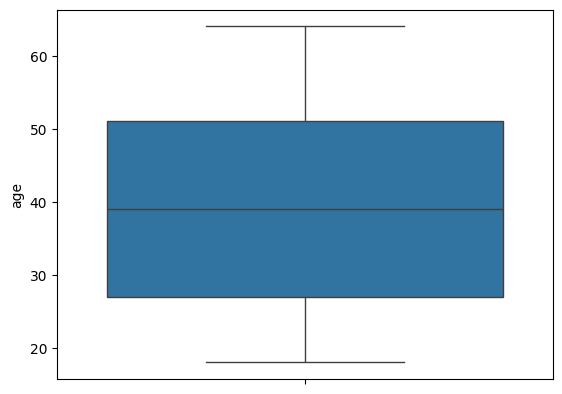

In [11]:
sns.boxplot(df['age'])

**SEX**

<Axes: xlabel='sex'>

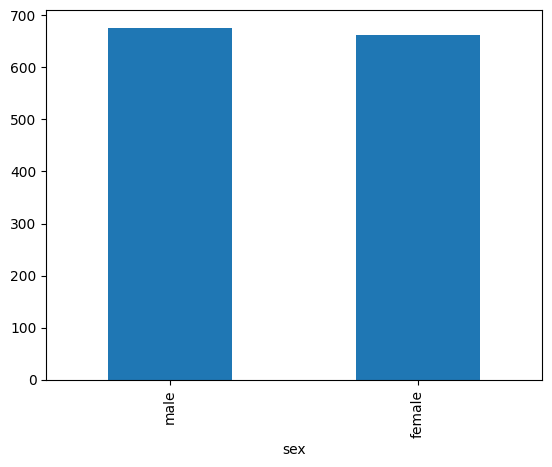

In [12]:
df['sex'].value_counts().plot(kind='bar')

<Axes: xlabel='smoker', ylabel='sex'>

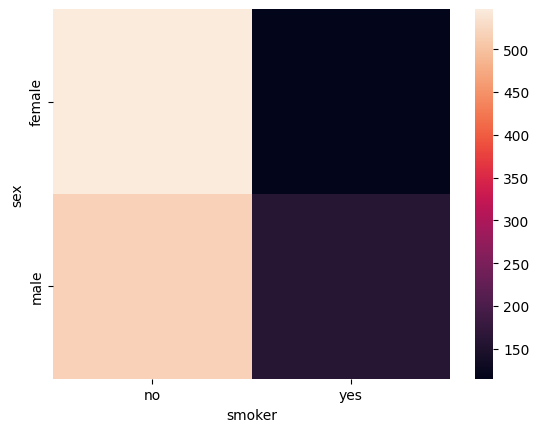

In [13]:
sns.heatmap(pd.crosstab(df['sex'],df['smoker']))

<Axes: xlabel='sex', ylabel='age'>

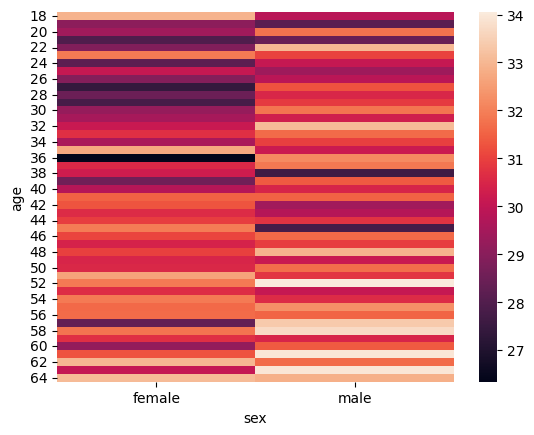

In [14]:
sns.heatmap(pd.pivot_table(data=df,index='age',columns='sex',values='bmi',aggfunc='mean'))

<Axes: xlabel='region', ylabel='sex'>

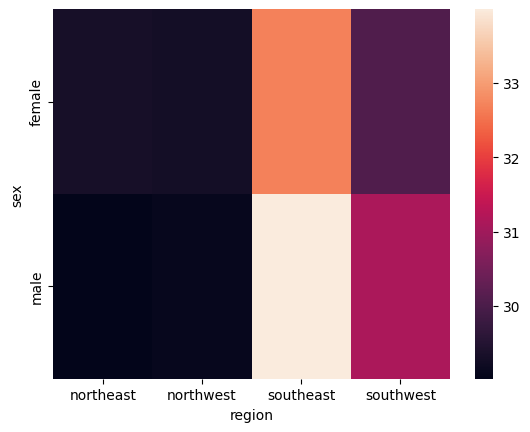

In [15]:
sns.heatmap(pd.crosstab(df['sex'],df['region'],values=df['bmi'],aggfunc='mean'))

**BMI**

0.2840471105987448


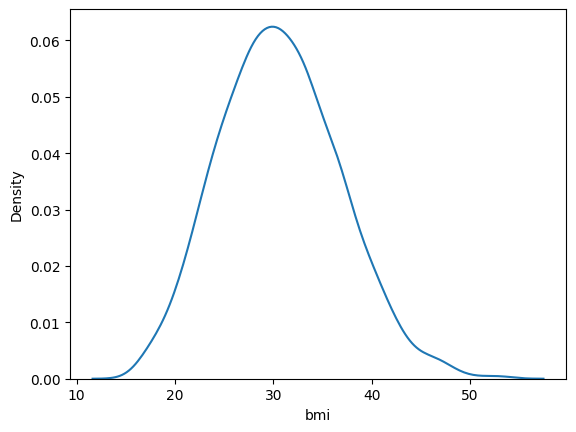

In [16]:
sns.kdeplot(df['bmi'])
print(df['bmi'].skew())

<Axes: ylabel='bmi'>

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


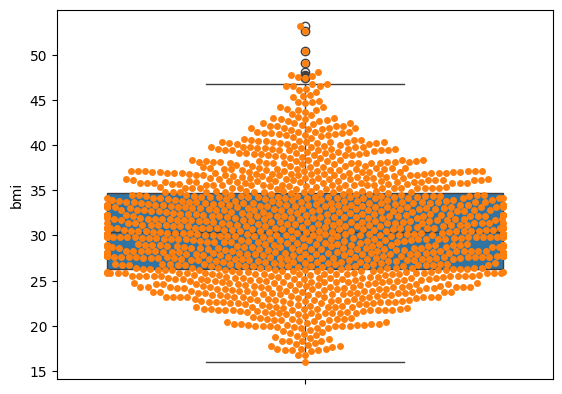

In [17]:
sns.boxplot(df['bmi'])
sns.swarmplot(df['bmi'])

**smoker**

(<Axes: title={'center': 'smoker'}, ylabel='count'>, Text(0.5, 1.0, 'smoker'))

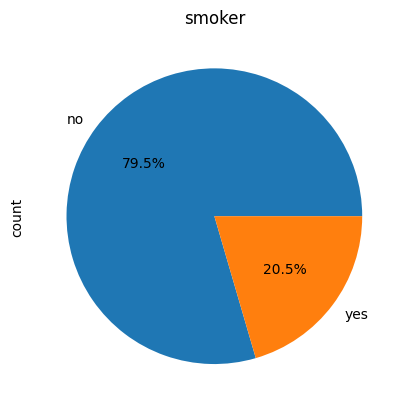

In [18]:
df['smoker'].value_counts().plot(kind='pie',autopct='%1.1f%%'),plt.title('smoker')

<Axes: xlabel='smoker'>

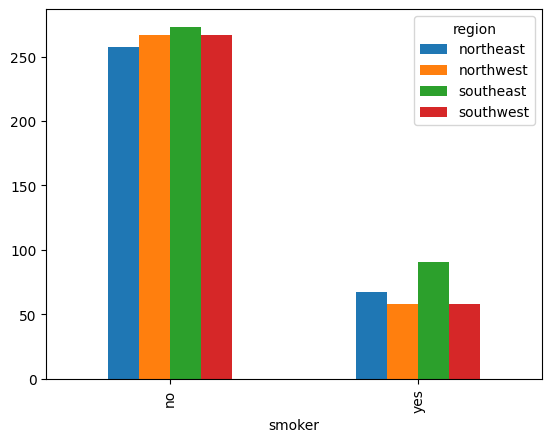

In [19]:
pd.crosstab(df['smoker'],df['region']).plot(kind='bar')

In [20]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

**children**

<Axes: xlabel='children'>

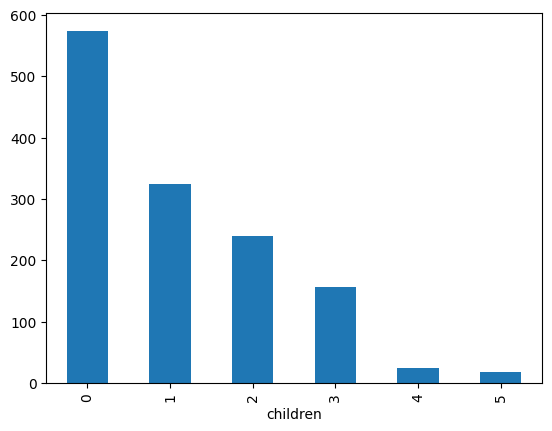

In [21]:
df['children'].value_counts().plot(kind='bar')

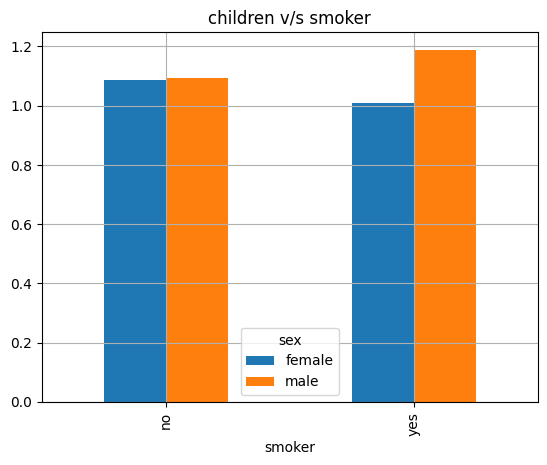

In [22]:
pd.pivot_table(data=df,index='smoker',columns='sex',values='children',aggfunc='mean').plot(kind='bar')
plt.title('children v/s smoker')
plt.grid()

<Axes: xlabel='children'>

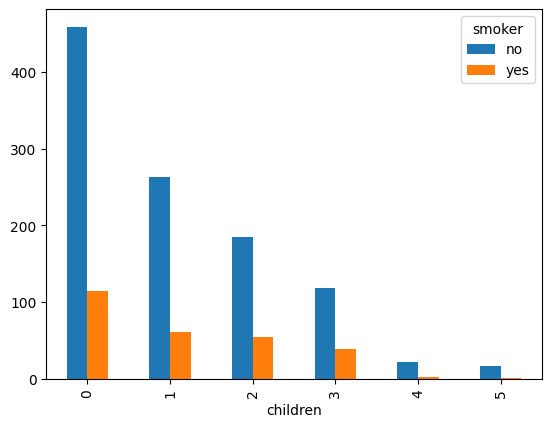

In [23]:
compare=pd.crosstab(df['children'],df['smoker'])
compare.plot(kind='bar')

**region**

<Axes: ylabel='count'>

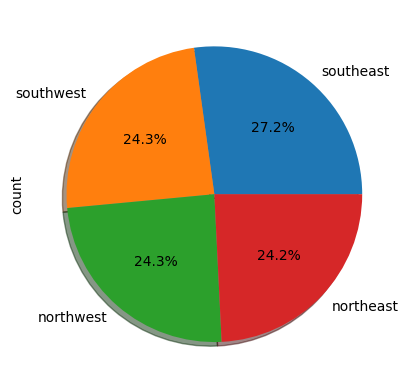

In [24]:
df['region'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True)

**charges**

<Axes: ylabel='Density'>

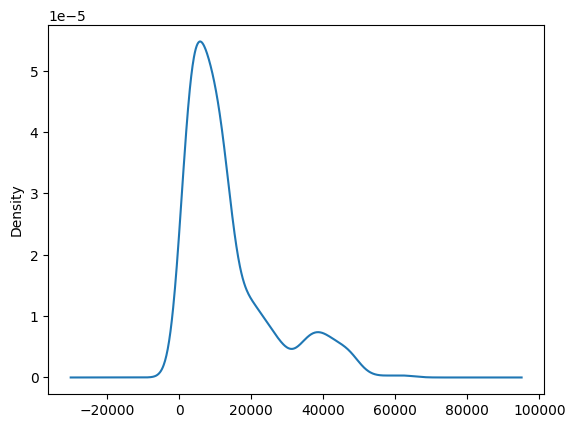

In [25]:
df['charges'].plot(kind='density')

In [26]:
df['charges'].skew()

np.float64(1.5158796580240388)

In [27]:
p=df.copy()

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Define your feature types
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Create transformers for each type
numeric_transformer = StandardScaler()
# remove sparse_output and handle_unknown to make it compatible with older versions
categorical_transformer = OneHotEncoder()

# Combine them in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)],remainder='passthrough'
    )

In [29]:
X=df.drop('charges',axis=1)
y=df['charges']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
piple = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])


In [32]:
 piple.fit(x_train, y_train)
 y_pred = piple.predict(x_test)

In [33]:
from sklearn import metrics

In [34]:
# R squared value
r2_train = metrics.r2_score(y_test, y_pred)
print('R squared vale : ', r2_train)

R squared vale :  0.7835929767120722


In [35]:
piple['model'].coef_

array([ 3.61497541e+03,  2.03622812e+03,  5.16890247e+02,  9.29584582e+00,
       -9.29584582e+00, -1.18255644e+04,  1.18255644e+04,  4.59585244e+02,
        8.89079180e+01, -1.98279052e+02, -3.50214110e+02])

<Axes: >

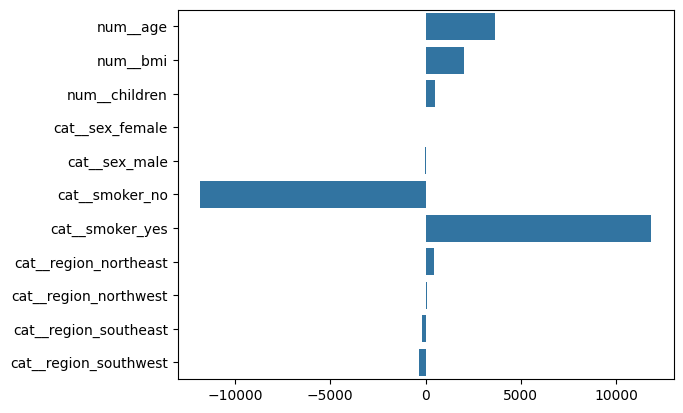

In [36]:
# Get feature names after transformation
feature_names = piple['preprocessor'].get_feature_names_out()

# Create a bar plot using the transformed feature names
sns.barplot(x=piple['model'].coef_, y=feature_names)

In [37]:
from sklearn.linear_model import Lasso

In [38]:
piple = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.1))
])


In [39]:
 piple.fit(x_train, y_train)
 y_pred = piple.predict(x_test)

In [40]:
r2_train = metrics.r2_score(y_test, y_pred)
print('R squared vale : ', r2_train)

R squared vale :  0.783591171445234


In [69]:
from sklearn.tree import DecisionTreeRegressor

In [70]:
piple = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model',  DecisionTreeRegressor(max_depth=5, random_state=42))
])


In [71]:
piple.fit(x_train, y_train)
y_pred = piple.predict(x_test)

In [72]:
r2_train = metrics.r2_score(y_test, y_pred)
print('R squared vale : ', r2_train)

R squared vale :  0.8334428126395235


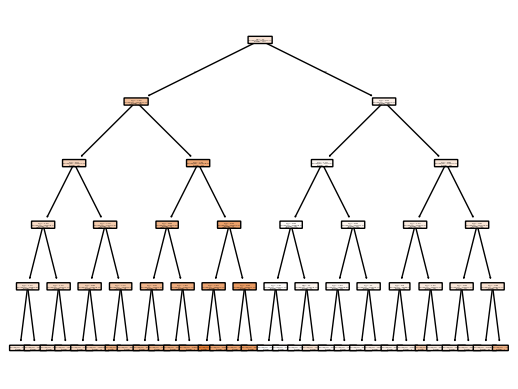

In [45]:
from sklearn.tree import plot_tree
plot_tree(piple.named_steps['model'],filled=True,rounded=True)
plt.show()

In [46]:
from sklearn.svm import SVR

In [47]:
  # You can adjust kernel, C, and epsilon
piple = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model',  SVR(kernel='rbf', C=3.0, epsilon=0.2))
])

In [48]:
piple.fit(x_train, y_train)
y_pred = piple.predict(x_test)

In [49]:
r2_train = metrics.r2_score(y_test, y_pred)
print('R squared vale : ', r2_train)

R squared vale :  -0.06387672194199268


In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
# Update param_dist to include the 'model__' prefix for SVR parameters
param_dist = {
    'model__C': [0.1, 1, 50, 100],
    'model__epsilon': [0.01, 0.1, 0.5, 1],
    'model__kernel': ['linear', 'rbf', 'poly'],
    'model__gamma': ['scale', 'auto']
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=piple, param_distributions=param_dist, n_iter=20, cv=5, scoring='r2', verbose=1, random_state=42)

# Fit the RandomizedSearchCV object
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['age',
                                                                                'bmi',
                                                                                'children']),
                                                                              ('cat',
                                                                               OneHotEncoder(),
                                                                               ['sex',
                                                                                'smoker',
                                                                                'region'])])),
                                             ('model',
                                              SVR(C=3.0, epsilon=0.2))]),
                   n_iter=20,
                   param_distributions={'model__C': [0.1, 1, 50, 100],
                                        'model__epsilon': [0.01, 0.1, 0.5, 1],
                                        'model__gamma': ['scale', 'auto'],
                                        'model__kernel': ['linear', 'rbf',
                                                          'poly']},
                   random_state=42, scoring='r2', verbose=1)

In [52]:
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best R² Score: {random_search.best_score_}")

Best Parameters: {'model__kernel': 'linear', 'model__gamma': 'auto', 'model__epsilon': 1, 'model__C': 50}
Best R² Score: 0.49810257300858946


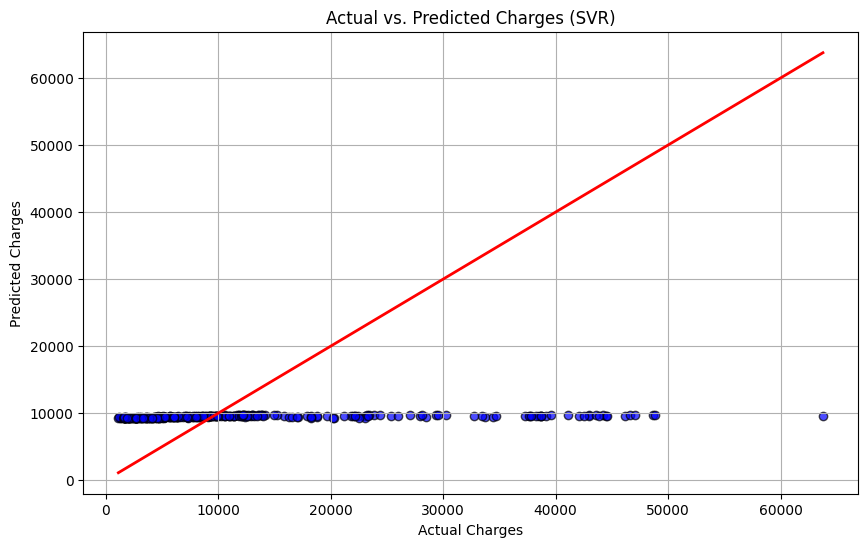

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='black', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Diagonal line
plt.title('Actual vs. Predicted Charges (SVR)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True)
plt.show()

In [54]:
from sklearn.neighbors import KNeighborsRegressor
pipel = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KNeighborsRegressor(n_neighbors=5))  # You can adjust n_neighbors
])

# Fit the model
pipel.fit(x_train, y_train)

# Make predictions
y_pred_knn =pipel.predict(x_test)

# Evaluate performance
r2_knn = r2_score(y_test, y_pred_knn)
print('R-squared (KNN):', r2_knn)

R-squared (KNN): 0.7682154529775659


In [55]:
# Assuming you have your preprocessor and pipeline defined as before

# Define the hyperparameter grid
param_dist = {
    'model__n_neighbors': list(range(1, 31)),  # Explore n_neighbors from 1 to 30
    'model__weights': ['uniform', 'distance'],  # Explore different weight functions
    'model__metric': ['euclidean', 'manhattan']  # Explore different distance metrics
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=pipel,
    param_distributions=param_dist,
    n_iter=100,  # Number of iterations
    cv=5,  # Number of cross-validation folds
    scoring='r2',  # Use R-squared for scoring
    verbose=1,
    random_state=42  # For reproducibility
)

# Fit the RandomizedSearchCV object
random_search.fit(x_train, y_train)

# Print the best parameters and score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best R² Score: {random_search.best_score_}")

# Get the best model
best_knn_model = random_search.best_estimator_

# Make predictions using the best model
y_pred_best = best_knn_model.predict(x_test)

# Evaluate performance
r2_best = r2_score(y_test, y_pred_best)
print('R-squared (Best KNN):', r2_best)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'model__weights': 'distance', 'model__n_neighbors': 7, 'model__metric': 'manhattan'}
Best R² Score: 0.7767254475870493
R-squared (Best KNN): 0.794374107565033


In [56]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# Assuming you have your preprocessor defined as before
# preprocessor = ColumnTransformer(...)

# Create a pipeline with Gradient Boosting Regressor
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])

# Fit the model
gb_pipeline.fit(x_train, y_train)

# Make predictions
y_pred_gb = gb_pipeline.predict(x_test)

# Evaluate performance
r2_gb = r2_score(y_test, y_pred_gb)
print('R-squared (Gradient Boosting):', r2_gb)

R-squared (Gradient Boosting): 0.8793364486536337


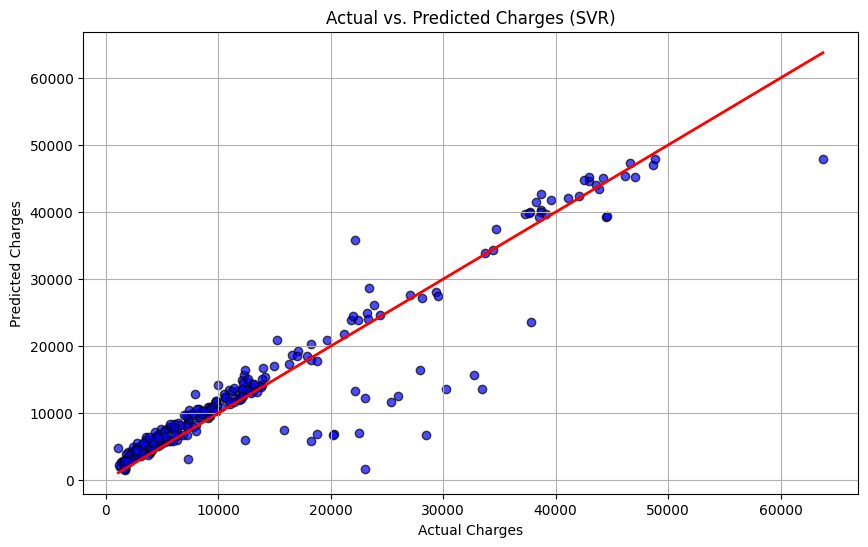

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, color='blue', edgecolors='black', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Diagonal line
plt.title('Actual vs. Predicted Charges (SVR)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True)
plt.show()

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

# Assuming you have your preprocessor and gb_pipeline defined as before

# Define the hyperparameter grid
param_dist = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 4, 5],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__subsample': [0.8, 0.9, 1.0]
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=gb_pipeline,
    param_distributions=param_dist,
    n_iter=50,  # Number of random combinations to try
    cv=5,  # Number of cross-validation folds
    scoring='r2',  # Use R-squared for scoring
    verbose=1,  # Print progress messages
    random_state=42,  # For reproducibility
    n_jobs=-1  # Use all available CPU cores for parallel processing
)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:", random_search.best_params_)
print("Best R-squared Score:", random_search.best_score_)

# Get the best model from the search
best_gb_model = random_search.best_estimator_

# Make predictions on the test data using the best model
y_pred_best_gb = best_gb_model.predict(x_test)

# Evaluate the performance of the best model using R-squared
r2_best_gb = r2_score(y_test, y_pred_best_gb)
print("R-squared (Best Gradient Boosting):", r2_best_gb)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'model__subsample': 0.8, 'model__n_estimators': 300, 'model__min_samples_split': 10, 'model__min_samples_leaf': 4, 'model__max_depth': 3, 'model__learning_rate': 0.01}
Best R-squared Score: 0.8489641032196509
R-squared (Best Gradient Boosting): 0.8753448364055361


In [59]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# Assuming preprocessor is already defined:
# preprocessor = ColumnTransformer([...])

# Create a pipeline with XGBoost Regressor
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Fit the model
xgb_pipeline.fit(x_train, y_train)

# Make predictions
y_pred_xgb = xgb_pipeline.predict(x_test)

# Evaluate performance
r2_xgb = r2_score(y_test, y_pred_xgb)
print('R-squared (XGBoost):', r2_xgb)


R-squared (XGBoost): 0.8553648660539922


In [60]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline # Import Pipeline

# Define the hyperparameter grid
param_dist = {
    'model__n_estimators': [100, 200, 300],  # Add 'model__' prefix
    'model__learning_rate': [0.01, 0.1, 0.2], # Add 'model__' prefix
    'model__max_depth': [3, 4, 5], # Add 'model__' prefix
    'model__subsample': [0.8, 0.9, 1.0], # Add 'model__' prefix
    'model__colsample_bytree': [0.8, 0.9, 1.0], # Add 'model__' prefix
    'model__gamma': [0, 0.1, 0.5], # Add 'model__' prefix
}

# Create a pipeline with XGBoost Regressor
xgb_pipeline = Pipeline(steps=[ # Use pipeline to include preprocessing
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(objective='reg:squarederror', random_state=42))
])


# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=xgb_pipeline,  # Use the pipeline as the estimator
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='r2',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:", random_search.best_params_)
print("Best R-squared Score:", random_search.best_score_)

# Get the best model from the search
best_xgb_model = random_search.best_estimator_

# Evaluate the model
y_pred = best_xgb_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("R-squared (XGBoost with Tuning):", r2)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'model__subsample': 1.0, 'model__n_estimators': 100, 'model__max_depth': 3, 'model__learning_rate': 0.1, 'model__gamma': 0, 'model__colsample_bytree': 1.0}
Best R-squared Score: 0.8443970798979457
R-squared (XGBoost with Tuning): 0.8837635299568553


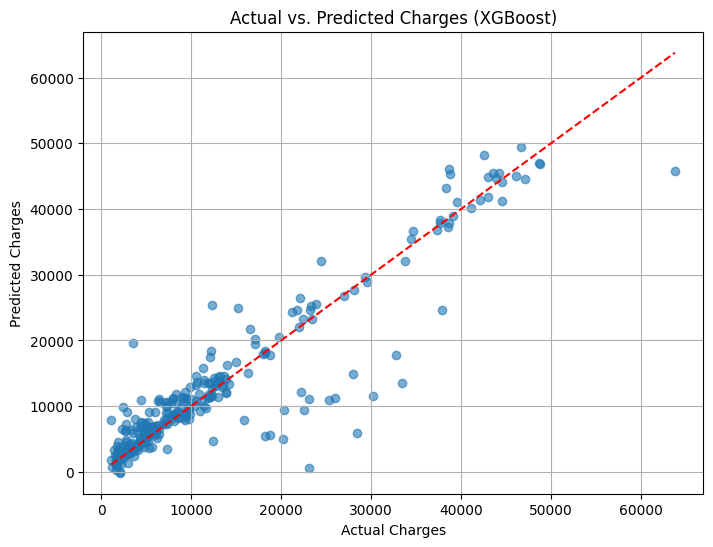

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges (XGBoost)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()


In [62]:
import pickle

# Save the trained pipeline
with open('xgb_medical_cost_model.pkl', 'wb') as f:
    pickle.dump(xgb_pipeline, f)

In [63]:
import pickle

# Save the pipeline to a file
with open('gb_pipeline.pkl', 'wb') as f:
    pickle.dump(gb_pipeline, f)

In [74]:
piple = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(max_depth=5, random_state=42))
])
piple.fit(x_train, y_train)

# Save it
import pickle
with open('pipeline.pkl', 'wb') as f:
    pickle.dump(piple, f)


In [75]:
import pickle

with open('pipeline.pkl', 'rb') as f:
    model = pickle.load(f)

print(model)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', DecisionTreeRegressor(max_depth=5, random_state=42))])


In [76]:
import pickle
model = pickle.load(open("pipeline.pkl", "rb"))
model.predict(pd.DataFrame({
    "age": [30],
    "sex": ["male"],
    "bmi": [25.0],
    "children": [0],
    "smoker": ["no"],
    "region": ["northwest"]
}))

array([5243.04129723])

In [77]:
import pickle

with open("pipeline.pkl", "rb") as f:
    model = pickle.load(f)

print("Loaded model:", model)
print("Can predict:", hasattr(model, "predict"))


Loaded model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat', OneHotEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', DecisionTreeRegressor(max_depth=5, random_state=42))])
Can predict: True
